<a href="https://colab.research.google.com/github/tuomaseerola/emr/blob/master/Chapter9.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9 Code (synchronization)

A Jupyter notebook with **code examples in R** for _Chapter 9_ of _Routlegde_ book titled **[How to Conduct Empirical Music Research](https://github.com/tuomaseerola/emr)** by [Tuomas Eerola](https://www.durham.ac.uk/staff/tuomas-eerola/), [Music and Science Lab]() at [Durham University](https://www.durham.ac.uk) and [Music and Science Lab](https://musicscience.net) scheduled to be published in 2023.

To run the code in your browser, open the file in Colab (click the icon "Open in Colab"). Alternatively, you can download the notebook and run it locally.

This notebook demonstrates how to calculate the synchrony between different members of the ensemble when we have multi-track audio and extracted onsets fro each instrument. The data is based on Poole (2021) and shared in [OSF](https://osf.io/sfxa2/), and [onsetsync tool](https://tuomaseerola.github.io/onsetsync/articles/onsetsync.html) is available at Github.   

> File `Chapter9.5.ipynb` | 
> Version `3/3/2023` |
> [Back to Index](https://github.com/tuomaseerola/emr)

---

### Load libraries

In [31]:
if (!require(devtools)) install.packages("devtools",quiet=TRUE)
devtools::install_github("tuomaseerola/onsetsync")
library(dplyr,quiet=TRUE)

Skipping install of 'onsetsync' from a github remote, the SHA1 (cbaba57b) has not changed since last install.
  Use `force = TRUE` to force installation



## Explore synchronisation in Cuban Salsa and Son
Take an example track from IEMP corpus and visualise beats and calculate the synchronies.

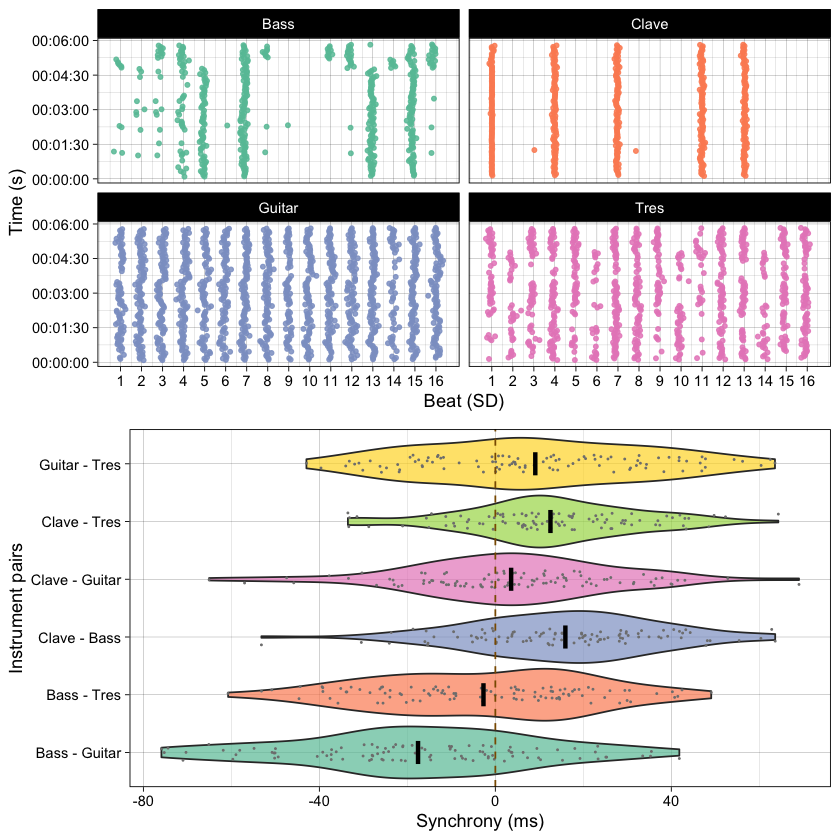

In [32]:
set.seed(1234)
CSS_Song2 <- onsetsync::CSS_IEMP[[2]]
fig1 <- plot_by_beat(df = CSS_Song2, 
                     instr = c('Bass','Clave','Guitar','Tres'), 
                     beat = 'SD', 
                     virtual = 'Isochronous.SD.Time',
                     pcols = 2)
inst <- c('Clave','Bass','Guitar','Tres') # Define instruments 
dn <- sync_execute_pairs(CSS_Song2,inst,100,1,'SD')
fig2 <- plot_by_pair(dn)  # plot
G <- cowplot::plot_grid(fig1,fig2,nrow = 2)
print(G)

In [33]:
round(mean(dn$asynch$`Clave - Guitar`)*1000,1)

[1] 3.6

In [34]:
round(mean(dn$asynch$`Clave - Bass`)*1000,1)

[1] 15.9

In [35]:
round(mean(dn$asynch$`Bass - Guitar`)*1000,1)

[1] -17.6

In [36]:
round(mean(dn$asynch$`Bass - Tres`)*1000,1)

[1] -2.7

## References


Poole, A. (2021). Groove in Cuban Son and Salsa Performance. _Journal of the Royal Musical Association, 146(1)_, 117-145. doi:10.1017/rma.2021.2